In [362]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [363]:
data_test = pd.read_csv("../data/BikeRentalDaily_test.csv", sep=";", index_col=0)
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
season,121.0,2.652893,1.123319,1.000000,2.000000,3.000000,4.000000,4.000000
yr,132.0,0.515152,0.501674,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,132.0,6.750000,3.497818,1.000000,3.750000,7.000000,10.000000,12.000000
holiday,132.0,0.022727,0.149600,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,132.0,2.590909,2.154188,-1.000000,1.000000,2.000000,5.000000,6.000000
workingday,132.0,0.704545,0.457985,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,132.0,1.371212,0.558150,1.000000,1.000000,1.000000,2.000000,3.000000
temp,132.0,19.844301,7.827241,3.895700,13.300000,19.200000,27.366675,33.933300
atemp,132.0,0.477679,0.173988,0.117930,0.325754,0.470002,0.635919,0.840896
hum,126.0,93.645418,21.467624,0.000000,80.692913,93.468750,107.484413,139.500000


In [364]:
data_test.isna().sum()

dteday              0
season             11
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                 6
windspeed           0
leaflets            0
price reduction     0
casual              0
registered          0
cnt                 0
dtype: int64

In [365]:
# datetime.datetime kann nicht mit 29. Feb umgehen, wenn keine Jahreszahl dabei ist
import time
def get_season_by_date(date: str):
    """Derive season by date"""
    dateformat = "%d.%m"

    # Season beginnings
    spring = time.strptime("20.03", dateformat)
    summer = time.strptime("20.06", dateformat)
    autumn = time.strptime("20.09", dateformat)
    winter = time.strptime("20.12", dateformat)

    date_p = time.strptime(date[:5], dateformat)

    if date_p < spring:
        return 1
    elif spring < date_p < summer:
        return 2
    elif summer < date_p < autumn:
        return 3
    elif autumn < date_p < winter:
        return 4
    else:
        return 1

In [366]:
def season_wrapper(row):
    row["season"] = get_season_by_date(row["dteday"])
    return row
data_test = data_test.apply(season_wrapper, axis=1)
data_test

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
299,26.10.2011,4,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
458,02.04.2012,2,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
687,17.11.2012,4,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
346,12.12.2011,4,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
291,18.10.2011,4,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,01.03.2012,1,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
547,30.06.2012,3,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
271,28.09.2011,4,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907


In [367]:
data_test["hum"].fillna(np.mean(data_test["hum"]), inplace=True)

In [368]:
def get_wday_by_date(row):
    if row["weekday"] > 0:
        return row
    weekday_shift = { # week starts on Sunday in dataset
        6: 0,
        0: 1,
        1: 2,
        2: 3,
        3: 4,
        4: 5,
        5: 6
    }
    dateformat = "%d.%m.%Y"
    row["weekday"] = weekday_shift[time.strptime(row["dteday"], dateformat).tm_wday]
    return row
data_test = data_test.apply(get_wday_by_date, axis=1)

<Axes: >

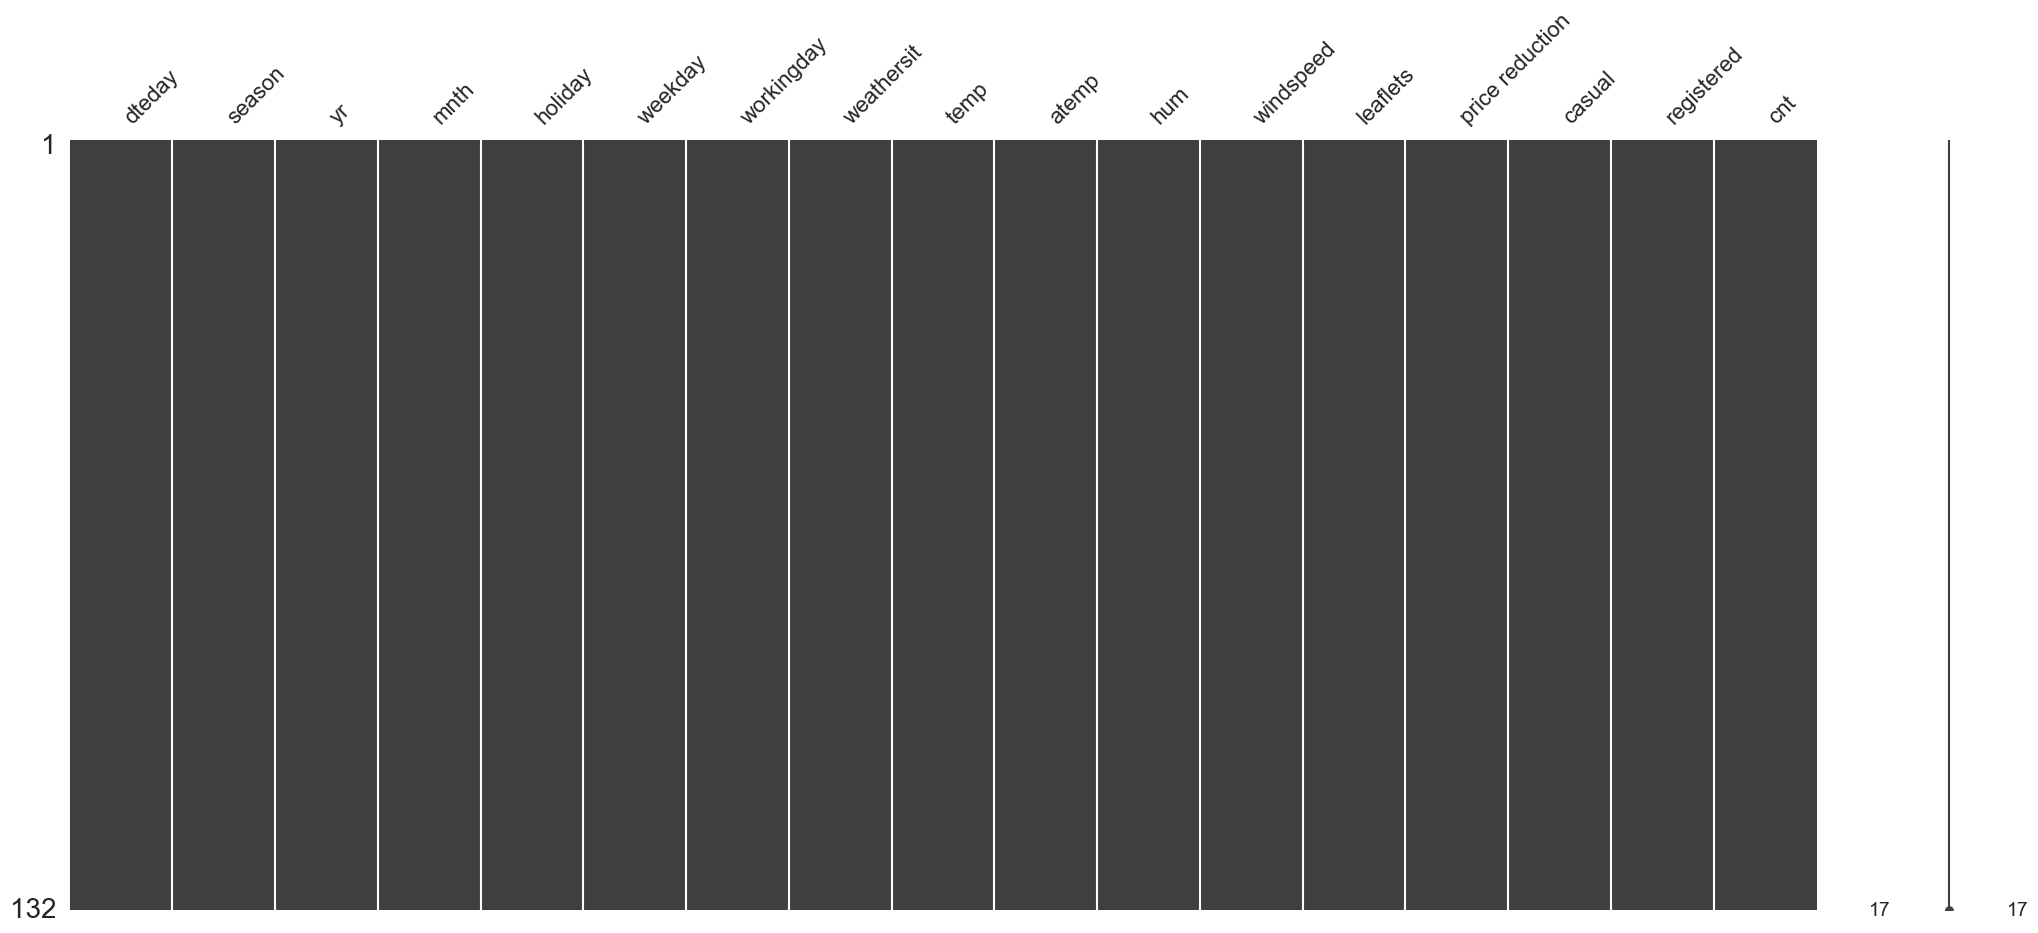

In [369]:
msno.matrix(data_test)

In [370]:
from scipy import stats
zscores = stats.zscore(data_test["casual"])
thresh = 3.0
outliers = data_test[abs(zscores) > thresh]
outliers

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
638,29.09.2012,4,1,9,0,6,0,1,21.7,0.530296,81.43755,0.227604,1001,0,26506,5966,32472


In [371]:
data_test = data_test.drop(outliers.index, errors="ignore")

In [372]:
data_test.to_csv("../data/prepared_test.csv", sep=";")

In [373]:
data_test = pd.read_csv("../data/prepared_test.csv", sep=";", index_col=0)
data_test.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
299,26.10.2011,4,0,10,0,3,1,2,19.3667,0.472846,108.062550,0.148642,605,0,404,3490,3894
458,02.04.2012,2,1,4,0,1,1,1,17.3565,0.427513,75.652200,0.312139,518,0,1208,4728,5936
687,17.11.2012,4,1,11,0,6,0,1,13.0000,0.326383,81.812550,0.179729,766,0,1313,4316,5629
346,12.12.2011,4,0,12,0,1,1,1,9.5333,0.270196,93.645418,0.063450,739,0,143,3167,3310
291,18.10.2011,4,0,10,0,2,1,2,21.3000,0.522721,105.250050,0.110087,463,0,637,4111,4748


In [374]:
data_train = pd.read_csv("../data/prepared_train.csv", sep=";", index_col=0).sort_index()
data_train.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,1,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600


In [375]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [376]:
scaler = StandardScaler()

X_train = scaler.fit_transform(data_train.drop(columns=["dteday", "casual", "registered", "cnt"]))
Y_train = data_train["cnt"].copy()

X_test = scaler.transform(data_test.drop(columns=["dteday", "casual", "registered", "cnt"]))
Y_test = data_test["cnt"].copy()

In [377]:
models = [LinearRegression(), Lasso(), Ridge(), ElasticNetCV()]

In [378]:
def evaluate_model(model):
    model.fit(X_train, Y_train)
    score = model.score(X_train, Y_train)
    y_pred = model.predict(X_test)

    return [repr(model), score, model.intercept_,
            mean_squared_error(Y_test, y_pred),
            mean_absolute_error(Y_test, y_pred),
            r2_score(Y_test, y_pred)]

In [379]:
for model in models:
    print(evaluate_model(model))

['LinearRegression()', 0.32387059287926256, 4705.011666666666, 1271897.8688349018, 802.4116806431485, 0.6668058481927883]
['Lasso()', 0.3238601911496336, 4705.011666666666, 1268107.4602849048, 802.7110359585034, 0.6677988068200214]
['Ridge()', 0.3238563297186654, 4705.011666666666, 1267480.5857651758, 802.5482083589465, 0.6679630267067032]
['ElasticNetCV()', 0.2496911038154701, 4705.011666666666, 1303977.376504866, 945.560143505863, 0.6584021039847114]


In [380]:
model = LinearRegression()

model.fit(X_train, Y_train)
print(model.score(X_train, Y_train))
y_pred = model.predict(X_test)

0.32387059287926256


In [381]:
model.intercept_

4705.011666666666

In [382]:
model.coef_

array([ 639.57696212, 1225.46047474, -132.62184301, -163.60948031,
        379.55960649, -209.61429447, -397.9708637 ,  -78.74145713,
       1197.50427227, -144.94874854,  -77.9097423 ,  164.58761891,
         93.93007535])

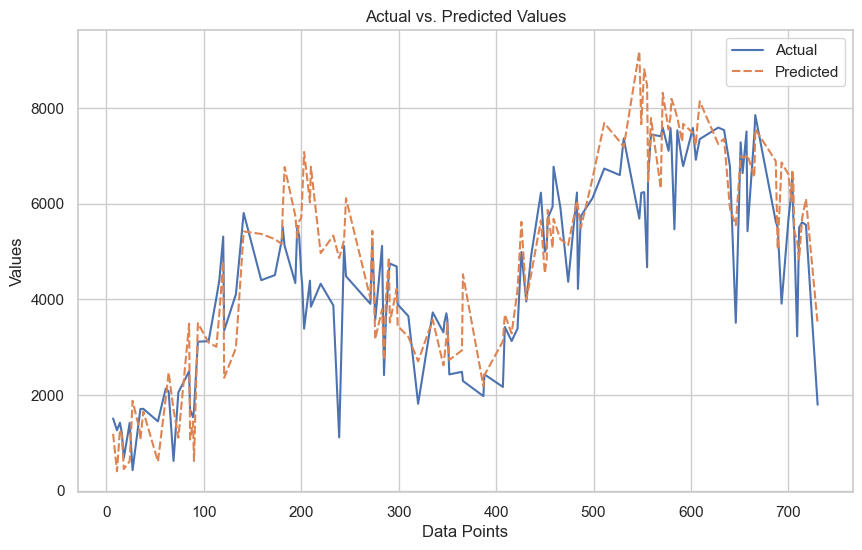

In [383]:
import seaborn as sns

data = {'Actual': Y_test, 'Predicted': y_pred}
df = pd.DataFrame(data)

# Create a lineplot with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=df, markers=False)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')

plt.show()

In [384]:
mean_squared_error(Y_test, y_pred)

1271897.8688349018

<Axes: xlabel='cnt'>

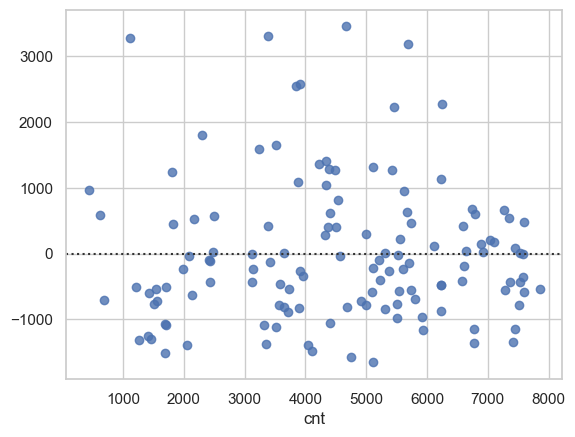

In [385]:
sns.residplot(x=Y_test, y=y_pred)